## Analyzing Demographic Diversity and Academic Achievement in NYC High Schools (2014-2015)

### Research Question: During the 2014-2015 school year, do high schools with more diverse student populations, as indicated by the racial breakdown, exhibit variations in average scores on SAT test sections compared to schools with less diverse student populations in New York City?

### Hypothesis: Schools with lower diversity will have higher SAT scores.

### Demographic Diversity Analysis

- Calculate descriptive statistics for the racial breakdown of students in each high school (e.g., percentages of different racial groups).

- Visualize demographic diversity using charts, such as bar plots or pie charts, to provide a clear overview.

In [1]:
import pandas as pd

# Load the dataset (replace 'dataset.csv' with your dataset file)
df = pd.read_csv('nyscores_clean.csv')
df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Percent White     385 non-null    object
 1   Percent Black     385 non-null    object
 2   Percent Hispanic  385 non-null    object
 3   Percent Asian     385 non-null    object
dtypes: object(4)
memory usage: 12.2+ KB
None


## Quantify Diversity

We'll quantify diversity in each school using the racial breakdown percentages (Percent White, Percent Black, Percent Hispanic, and Percent Asian). A common approach is to use a diversity index, such as the Simpson's Diversity Index or a similar metric. This index ranges from 0 (no diversity) to 1 (maximal diversity).

Next, we'll categorize the schools based on their diversity scores. To do this, I'll divide the schools into three categories: low, medium, and high diversity. We'll use quantiles (e.g., terciles) to categorize these groups. After categorizing, we'll compare the average SAT scores across these diversity groups.

In [7]:
def diversity_index(row):
    """
    Calculate the diversity index for a school based on the racial breakdown.
    The diversity index is calculated as 1 - sum(pi^2), where pi is the proportion of each race.
    """
    # Extract the racial percentages and convert to proportions
    races = ['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']
    proportions = []
    for race in races:
        # Convert percentage to proportion, handle missing or malformed data
        try:
            proportion = float(row[race].strip('%')) / 100
            proportions.append(proportion)
        except (TypeError, AttributeError, ValueError):
            # If data is missing or not a valid percentage, treat it as 0
            proportions.append(0)

    # Calculate the diversity index
    diversity = 1 - sum([p**2 for p in proportions if p > 0])
    return diversity

# Clean and convert SAT score columns to numeric
sat_columns = ['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']
df[sat_columns] = df[sat_columns].apply(pd.to_numeric, errors='coerce')

# Apply the diversity index calculation to each row
df['Diversity Index'] = df.apply(diversity_index, axis=1)

# Display the first few rows with the new 'Diversity Index' column
df[['School Name', 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Diversity Index']].head()

,School Name,Percent White,Percent Black,Percent Hispanic,Percent Asian,Diversity Index
0,"New Explorations into Science, Technology and ...",28.6%,13.3%,18.0%,38.5%,0.719890
1,Essex Street Academy,11.7%,38.5%,41.3%,5.9%,0.664036
2,Lower Manhattan Arts Academy,3.1%,28.2%,56.9%,8.6%,0.588358
3,High School for Dual Language and Asian Studies,1.7%,3.1%,5.5%,88.9%,0.205404
4,Henry Street School for International Studies,3.9%,24.4%,56.6%,13.2%,0.601163


## SAT scores across diversity groups

In [9]:
# Categorizing schools into 'low', 'medium', 'high' diversity based on terciles
diversity_terciles = pd.qcut(df['Diversity Index'], 3, labels=["Low", "Medium", "High"])

# Adding the diversity category to the dataframe
df['Diversity Category'] = diversity_terciles

# Grouping the data by diversity category and calculating the average SAT scores for each category
sat_scores_by_diversity = df.groupby('Diversity Category')[sat_columns].mean()

sat_scores_by_diversity

/var/folders/zd/ck0bw6r91_b9v8421q2dpn980000gn/T/ipykernel_59066/365057166.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sat_scores_by_diversity = df.groupby('Diversity Category')[sat_columns].mean()


,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
Diversity Category,,,
Low,403.175165,400.058886,393.392219
Medium,418.236840,415.494652,408.025902
High,476.976562,458.382812,454.875000


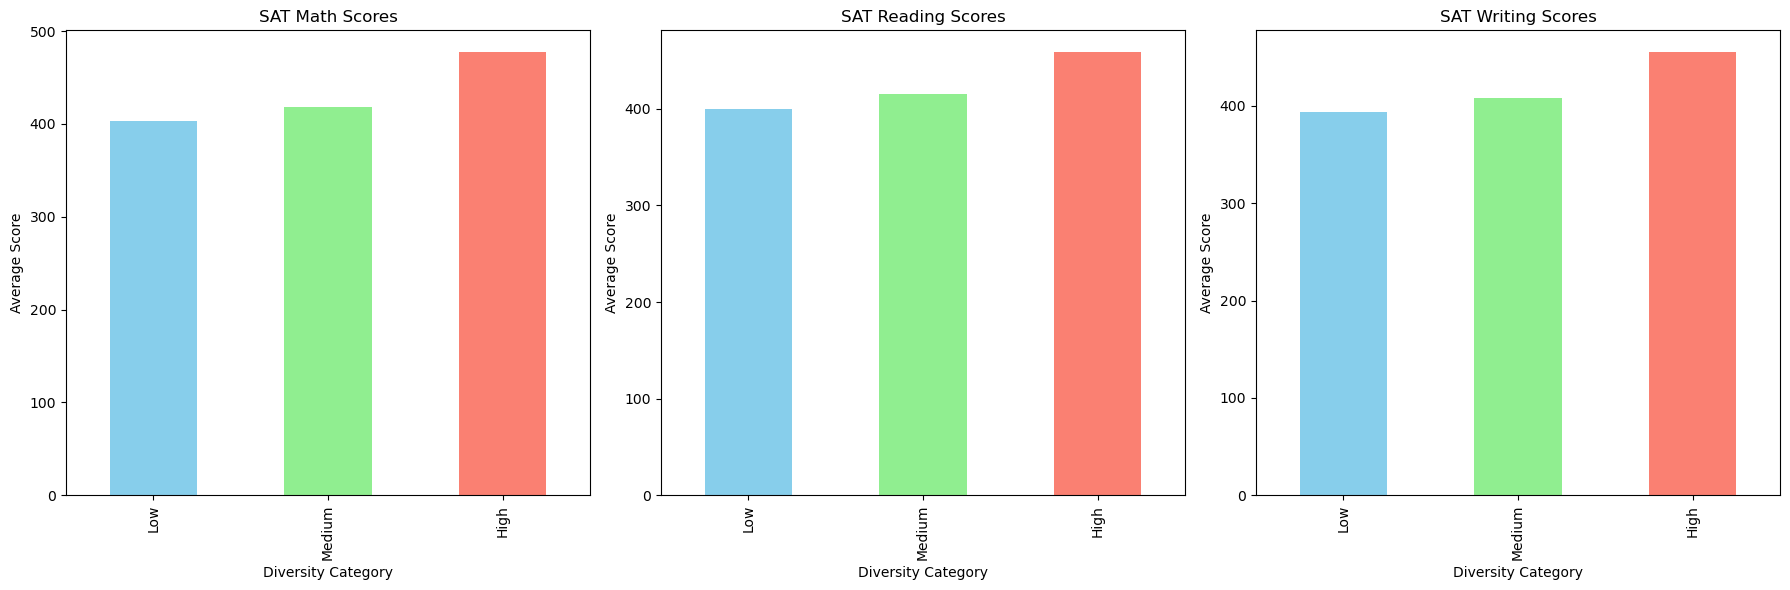

In [10]:
import matplotlib.pyplot as plt

# Setting up the figure and axes for the three plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Titles for each SAT section
titles = ['SAT Math Scores', 'SAT Reading Scores', 'SAT Writing Scores']

# Plotting each SAT section score by diversity category
for i, column in enumerate(sat_columns):
    sat_scores_by_diversity[column].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightgreen', 'salmon'])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Average Score')
    axes[i].set_xlabel('Diversity Category')

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()

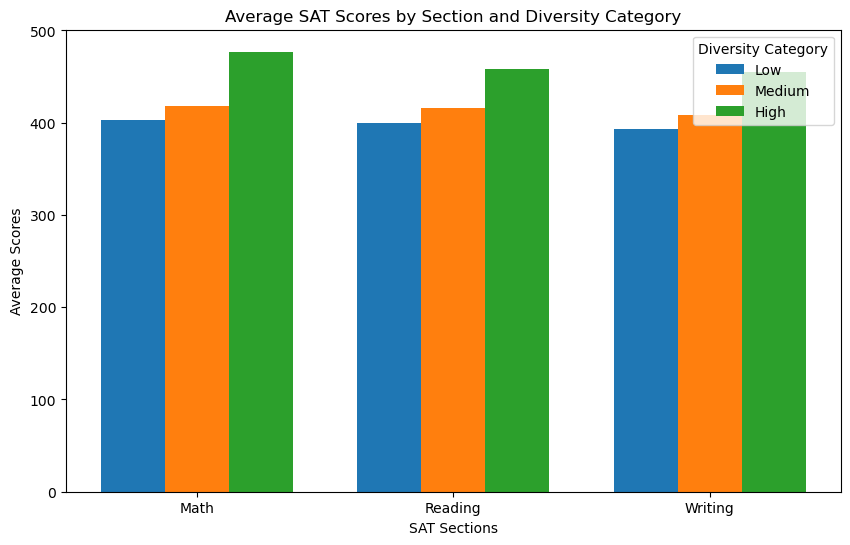

In [12]:
import numpy as np

# Setting up the figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Number of SAT sections
n_sections = len(sat_columns)
# The x locations for the groups
ind = np.arange(n_sections)
# The width of the bars
width = 0.25

# Plotting each diversity category
for i, category in enumerate(["Low", "Medium", "High"]):
    scores = sat_scores_by_diversity.loc[category]
    ax.bar(ind + i*width, scores, width, label=category)

# Adding labels and title
ax.set_xlabel('SAT Sections')
ax.set_ylabel('Average Scores')
ax.set_title('Average SAT Scores by Section and Diversity Category')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Math', 'Reading', 'Writing'))
ax.legend(title='Diversity Category')

# Show the plot
plt.show()

## Results

### From these results, it appears that schools with higher diversity (as measured by the diversity index) tend to have higher average SAT scores in all three sections (Math, Reading, Writing) compared to schools with lower diversity.
### This analysis provides an interesting insight into the relationship between student population diversity and academic performance as measured by SAT scores. Keep in mind, however, that correlation does not imply causation, and many other factors could influence these results.